# Figure 4.1 to 4.5

## Figure 4.1, 4.2, and 4.3

Steady states and phase plots in an assymetric network

In [1]:
using DifferentialEquations
using ModelingToolkit
using Plots
using LinearAlgebra
Plots.gr(lw=2)

Plots.GRBackend()

In [2]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
@parameters k_1 k_2 k_3 k_4 k_5 n
@variables t A(t) B(t)
D = Differential(t)

(::Differential) (generic function with 2 methods)

In [4]:
eqs = [ D(A) ~ k_1 * hill(1, B, n) - (k_3 + k_5)* A,
        D(B) ~ k_2 + k_5 * A - k_4 * B]
@named sys = ODESystem(eqs)

Model sys with 2 equations
States (2):
  A(t)
  B(t)
Parameters (6):
  n
  k_3
  k_1
  k_5
  k_4
  k_2

In [5]:
params = Dict(k_1=>20.0, k_2=>5.0, k_3=>5.0, k_4=>5.0, k_5=>2.0, n=>4)

u0s = (Dict(A=>0.0, B=>0.0), 
       Dict(A=>0.5, B=>0.6),
       Dict(A=>0.17, B=>1.1),
       Dict(A=>0.25, B=>1.9),
       Dict(A=>1.85, B=>1.70))

tend = 1.5

1.5

In [6]:
sols = map(u0s) do u0
    prob = ODEProblem(sys, u0, tend, params)
    sol = solve(prob)
end;

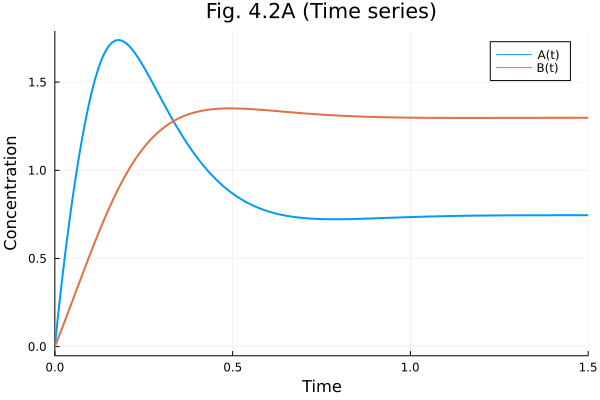

In [7]:
plot(sols[1], xlabel="Time", ylabel="Concentration", title="Fig. 4.2A (Time series)")

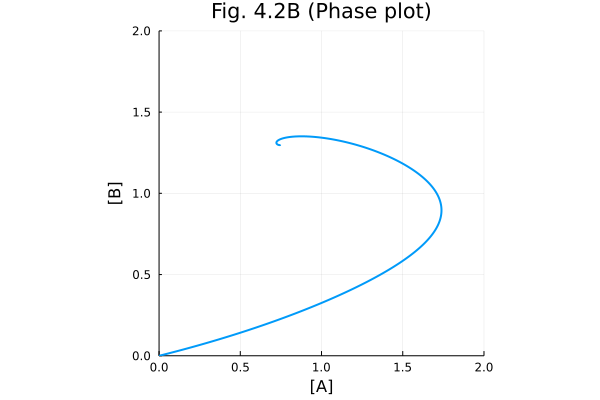

In [8]:
plot(sols[1], vars=(1, 2), xlabel="[A]", ylabel="[B]", aspect_ratio=:equal,
     title="Fig. 4.2B (Phase plot)", ylims=(0.0, 2.0), xlims=(0.0, 2.0), 
     legend=nothing)

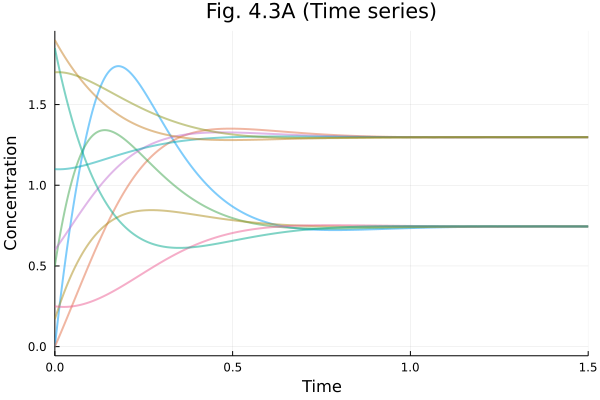

In [9]:
p3 = plot()
	
for sol in sols
    plot!(p3, sol, linealpha=0.5, legend = nothing)
end

plot!(p3, xlabel="Time", ylabel="Concentration", title="Fig. 4.3A (Time series)")

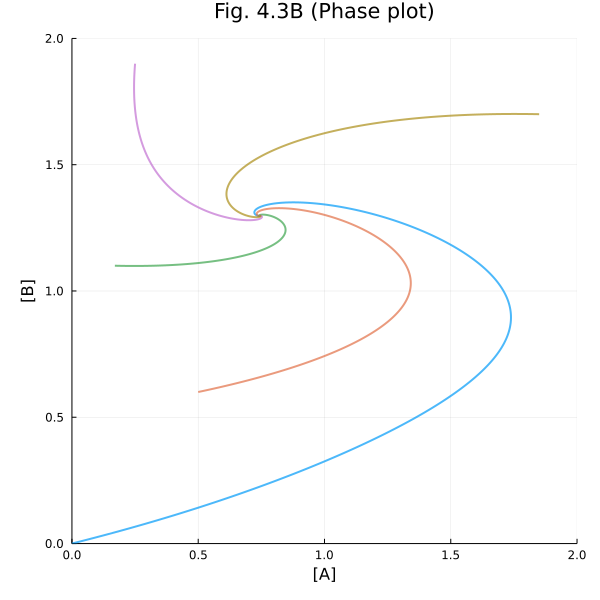

In [10]:
p4 = plot()
for sol in sols
    plot!(p4, sol, vars=(1, 2), linealpha=0.7, legend = nothing)
end
plot!(p4, aspect_ratio=:equal, title="Fig. 4.3B (Phase plot)", xlabel="[A]", ylabel="[B]", ylims=(0.0, 2.0), xlims=(0.0, 2.0), size=(600, 600))

## Figure 4.4, 4.5 

Vector fields

In [11]:
# Nullclines

nullcline_a(b) = params[k_1] / (params[k_5] + params[k_4])  * hill(1, b, params[n])
nullcline_b(b) = (params[k_4]*b - params[k_2]) / params[k_5]

nullcline_b (generic function with 1 method)

In [12]:
rhs = [x.rhs for x in collect(eqs)]

2-element Vector{SymbolicUtils.Add{Real, Int64, Dict{Any, Number}, Nothing}}:
 (k_1*(1^n)) / (1^n + B(t)^n) - (k_3 + k_5)*A(t)
 k_2 + k_5*A(t) - k_4*B(t)

In [13]:
oop, iip = eval.(ModelingToolkit.build_function(rhs, [A, B], [k_1, k_2, k_3, k_4, k_5, n], t))

(var"#5#6"(), var"#7#8"())

In [14]:
oop([0, 0], [20, 5, 5, 5, 2, 4], 0.0)

2-element Vector{Float64}:
 20.0
  5.0

In [15]:
# function for vector field
function ∂F(x, y, params; scale=20)
	du = oop([x, y], params, 0.0)
	return du ./ (norm(du)^0.5 * scale)
end

∂F (generic function with 1 method)

In [16]:
# Mesh points
xx = [x for y in 0.0:0.1:2.0, x in 0.0:0.1:2.0];
yy = [y for y in 0.0:0.1:2.0, x in 0.0:0.1:2.0];

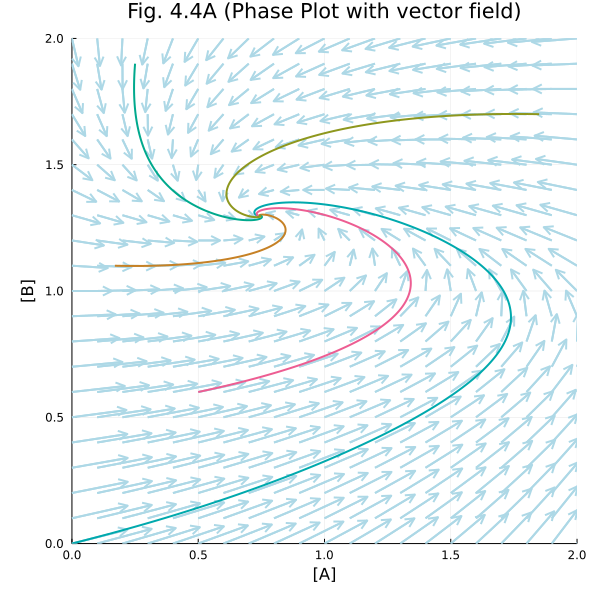

In [17]:
p1 = quiver(xx, yy, quiver=(x, y)->∂F(x, y, [20, 5, 5, 5, 2, 4]), line=(:lightblue))
for sol in sols
    plot!(p1, sol, vars=(1, 2), legend = nothing)
end

plot!(p1, aspect_ratio=:equal, title="Fig. 4.4A (Phase Plot with vector field)", 
  xlabel="[A]", ylabel="[B]", xlim=(0.0, 2.0), ylim=(0.0, 2.0), size=(600, 600))

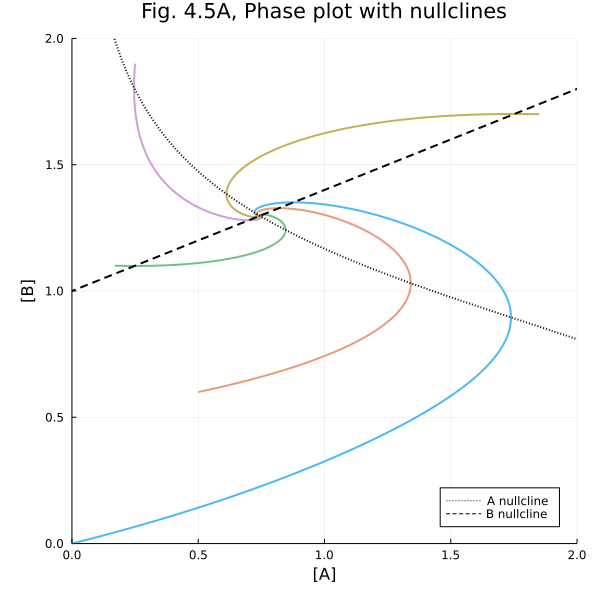

In [18]:
# Figure 4.5A
p45a = plot(aspect_ratio=:equal, title="Fig. 4.5A, Phase plot with nullclines")

# Phase plots
for sol in sols
    plot!(p45a, sol, vars=(1, 2), linealpha=0.7, lab=nothing)
end

# Parametric plotting for nullcline
plot!(p45a, nullcline_a, identity, 0.0, 2.0, label="A nullcline", line=(:black, :dot))
plot!(p45a, nullcline_b, identity, 0.0, 2.0, label="B nullcline", line=(:black, :dash))
plot!(p45a, xlim=(0.0, 2.0), ylim=(0.0, 2.0), legend=:bottomright, size=(600, 600), xlabel="[A]", ylabel="[B]")

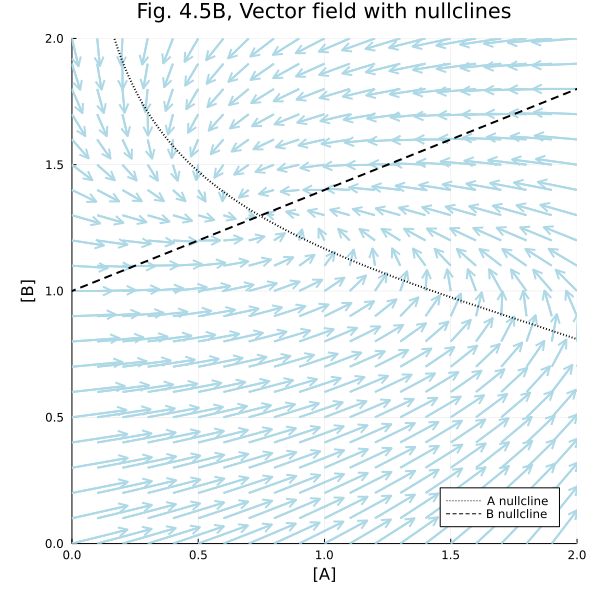

In [19]:
p45b = quiver(xx, yy, quiver=(x, y)->∂F(x, y, [20, 5, 5, 5, 2, 4]), line=(:lightblue), title="Fig. 4.5B, Vector field with nullclines", xlabel="[A]", ylabel="[B]")
plot!(p45b, nullcline_a, identity, 0.0, 2.0, label="A nullcline", line=(:black, :dot))
plot!(p45b, nullcline_b, identity, 0.0, 2.0, label="B nullcline", line=(:black, :dash))
plot!(p45b, aspect_ratio=1.0, xlim=(0.0, 2.0), ylim=(0.0, 2.0), legend=:bottomright, size=(600, 600))